### Visualización

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns


import folium 
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('./iFlowDatos_Limpios.csv')
df.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.516667,24.910,30,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.866667,26.260,38,2024-05-10,Friday,12:05:00,2024-05-10,Friday,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.400000,24.888,32,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,09:41:36,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,1.800000,14.040,28,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,13:32:55,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.116667,14.377,31,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,15:36:00,15:36:00


### Análisis Univariado

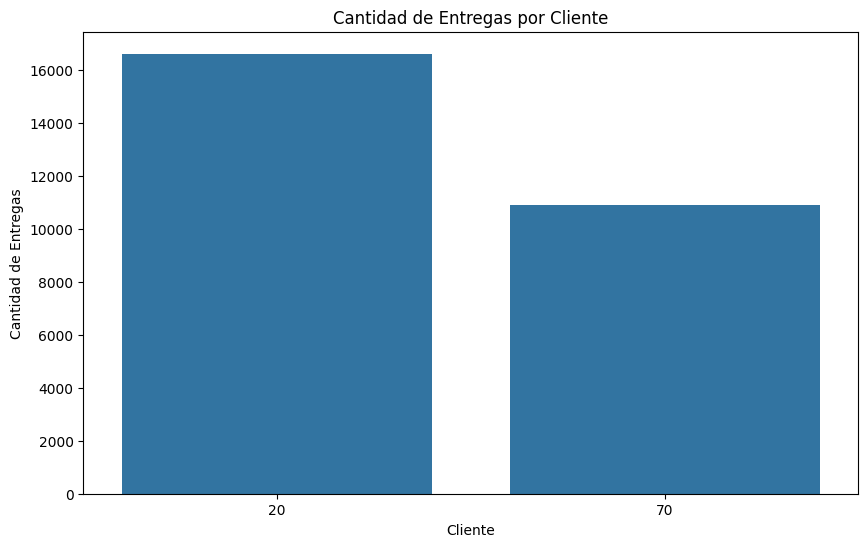

In [3]:
entregas_por_cliente = df.groupby('cliente').size().reset_index(name='cantidad_entregas')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cliente', y='cantidad_entregas', data=entregas_por_cliente)

# Añadir etiquetas y título
plt.xlabel('Cliente')
plt.ylabel('Cantidad de Entregas')
plt.title('Cantidad de Entregas por Cliente')

# Mostrar el gráfico
plt.show()

Hay una diferencia aproximada de 5000 entregas de diferencia entre clientes

C:\Users\PC\AppData\Local\Temp\ipykernel_12260\1657004932.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)


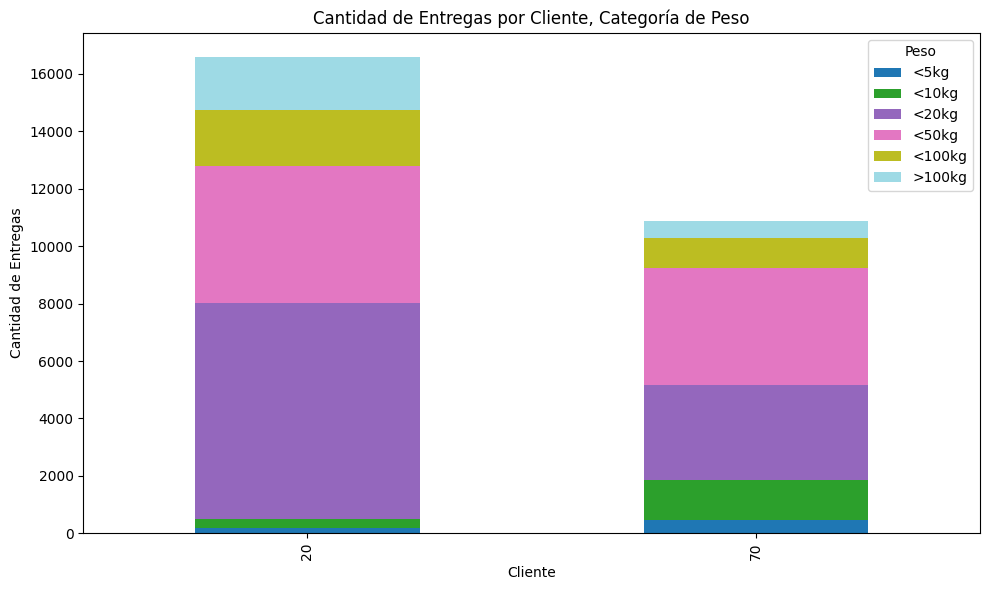

In [4]:
# Categorizar el peso en las clases mencionadas
bins = [0, 5, 10, 20, 50, 100, float('inf')]  # Límites de las categorías
labels = ['<5kg', '<10kg', '<20kg', '<50kg', '<100kg', '>100kg']  # Etiquetas
df['categoria_peso'] = pd.cut(df['Peso'], bins=bins, labels=labels, right=False)

# Agrupar por cliente y categoría de peso, y contar las entregas
entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
entregas_por_cliente_peso.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Añadir etiquetas y título
plt.xlabel('Cliente')
plt.ylabel('Cantidad de Entregas')
plt.title('Cantidad de Entregas por Cliente, Categoría de Peso')
plt.legend(title='Peso')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12260\3872089311.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_peso_cliente = df.groupby(['categoria_peso', 'cliente']).size().unstack(fill_value=0)


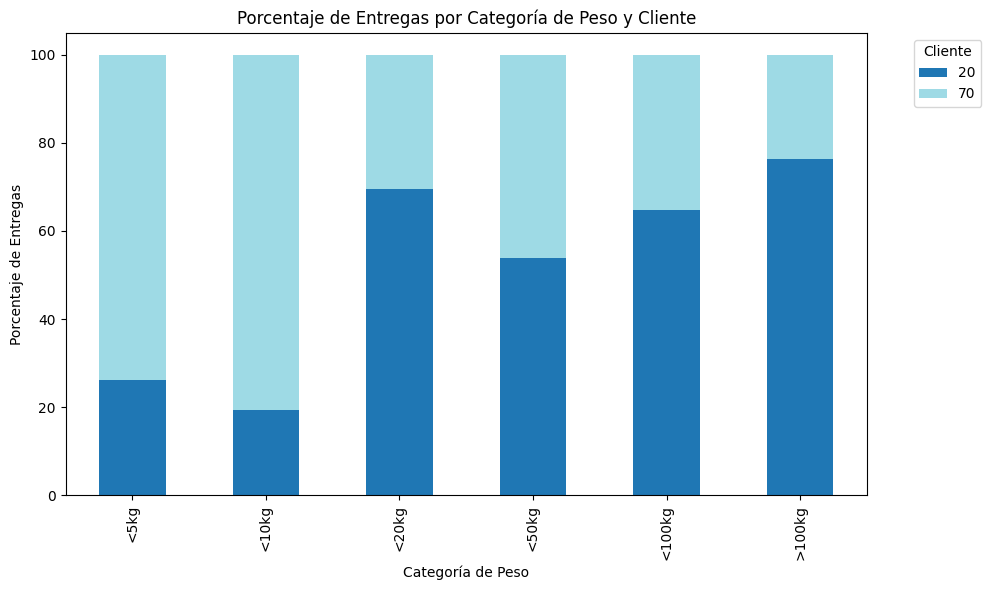

In [5]:
entregas_por_peso_cliente = df.groupby(['categoria_peso', 'cliente']).size().unstack(fill_value=0)

# Convertir a porcentajes por categoría de peso
entregas_por_peso_cliente_pct = entregas_por_peso_cliente.div(entregas_por_peso_cliente.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
entregas_por_peso_cliente_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Añadir etiquetas y título
plt.xlabel('Categoría de Peso')
plt.ylabel('Porcentaje de Entregas')
plt.title('Porcentaje de Entregas por Categoría de Peso y Cliente')
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El cliente 70 tiene la mayoria de las entregas mas livianas (menos de 10 kilos)
Mientras que para los pesos mayores a 10kg, el cliente 20 predomina

C:\Users\PC\AppData\Local\Temp\ipykernel_12260\2603022804.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)


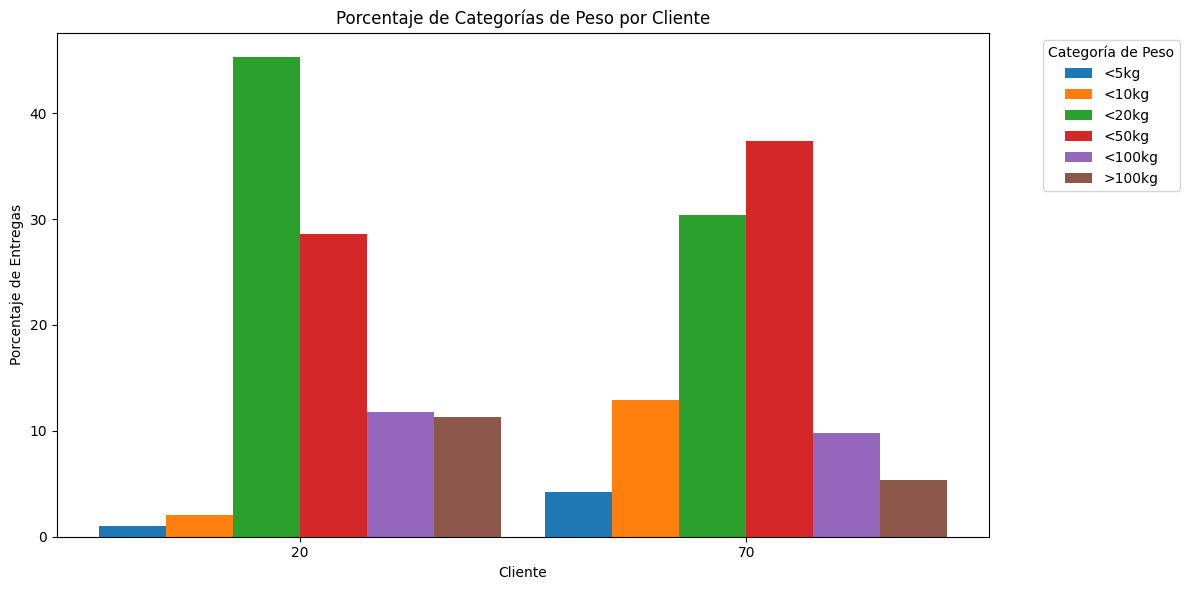

In [6]:
# Agrupar por cliente y categoría de peso, y contar las entregas
entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)

# Convertir a porcentajes por cliente
entregas_por_cliente_peso_pct = entregas_por_cliente_peso.div(entregas_por_cliente_peso.sum(axis=1), axis=0) * 100

# Crear las posiciones para cada barra agrupada
clientes = entregas_por_cliente_peso_pct.index
categorias_peso = entregas_por_cliente_peso_pct.columns
n_clientes = len(clientes)
n_categorias = len(categorias_peso)
bar_width = 0.15  # Ancho de cada barra
r = np.arange(n_clientes)  # Posiciones de los clientes en el eje x

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))

for i, categoria in enumerate(categorias_peso):
    plt.bar(r + i * bar_width, entregas_por_cliente_peso_pct[categoria], width=bar_width, label=categoria)

# Añadir etiquetas y título
plt.xlabel('Cliente')
plt.ylabel('Porcentaje de Entregas')
plt.title('Porcentaje de Categorías de Peso por Cliente')
plt.xticks(r + bar_width * (n_categorias - 1) / 2, clientes)  # Ajustar las posiciones del eje x para los clientes
plt.legend(title='Categoría de Peso', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La mayoria de entregas para ambos clientes varian entre 10-50kg

C:\Users\PC\AppData\Local\Temp\ipykernel_12260\1453322605.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_cliente_peso = df.groupby(['provincia', 'categoria_peso']).size().unstack(fill_value=0)


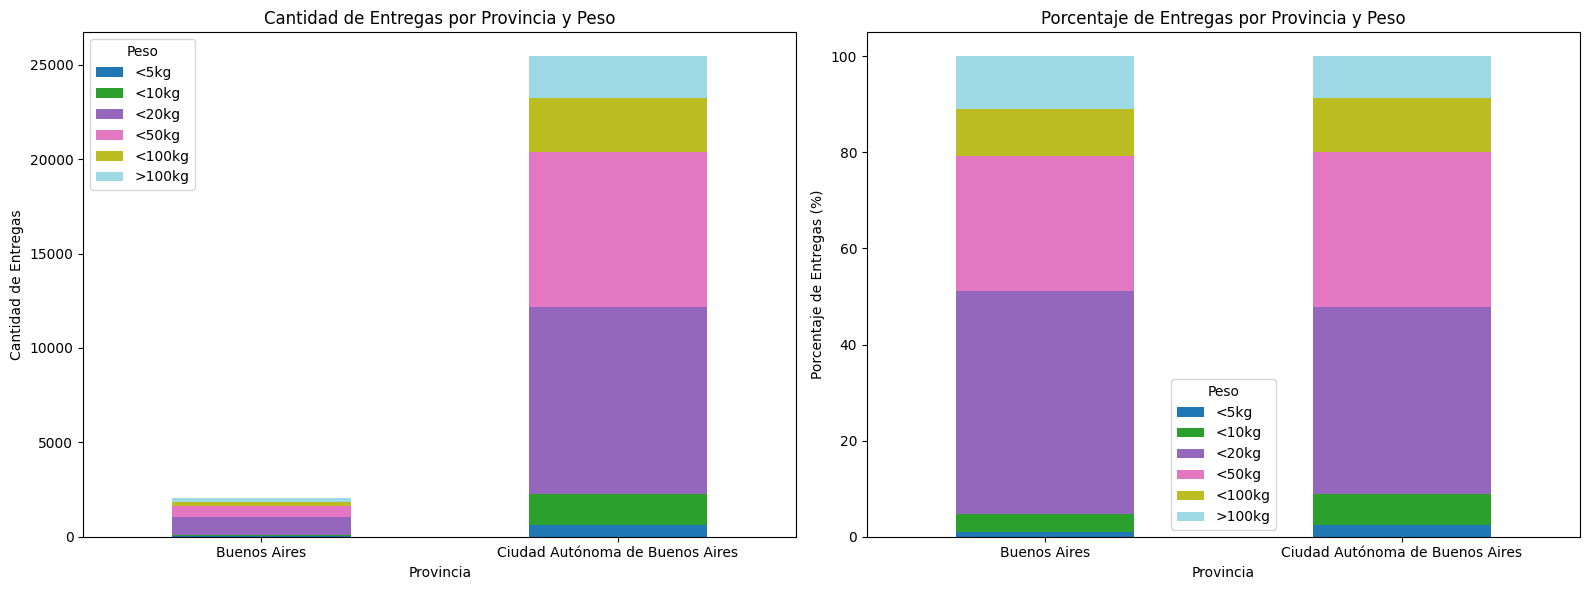

In [7]:


# Agrupar por provincia y categoría de peso, y contar las entregas
entregas_por_cliente_peso = df.groupby(['provincia', 'categoria_peso']).size().unstack(fill_value=0)

# Crear los subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Cantidad de entregas por provincia y categoría de peso (gráfico original)
entregas_por_cliente_peso.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_xlabel('Provincia')
axes[0].set_ylabel('Cantidad de Entregas')
axes[0].set_title('Cantidad de Entregas por Provincia y Peso')
axes[0].legend(title='Peso')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico 2: Porcentaje de entregas por provincia y categoría de peso
# Calcular porcentajes
porcentaje_entregas = entregas_por_cliente_peso.div(entregas_por_cliente_peso.sum(axis=1), axis=0) * 100

# Crear gráfico de barras apiladas para porcentajes
porcentaje_entregas.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_xlabel('Provincia')
axes[1].set_ylabel('Porcentaje de Entregas (%)')
axes[1].set_title('Porcentaje de Entregas por Provincia y Peso')
axes[1].legend(title='Peso')
axes[1].tick_params(axis='x', rotation=0)

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Análisis Bivariado

#### Relaciones entre Bulto,Peso y Unidades por Cliente

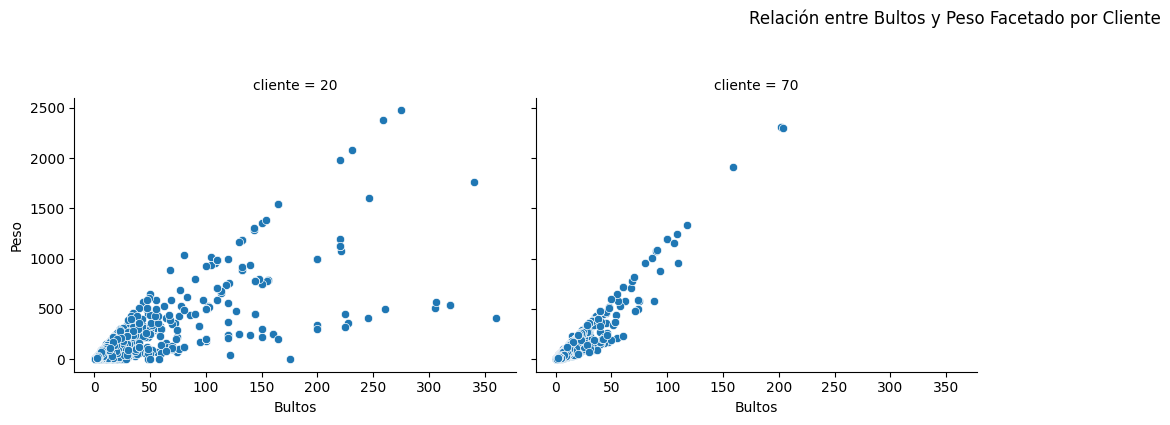

In [9]:
# Crear el FacetGrid, facetando por cliente
g = sns.FacetGrid(df, col='cliente', col_wrap=4, height=4, aspect=1.2)
g.map(sns.scatterplot, 'Bultos', 'Peso')

# Añadir título general
g.fig.suptitle('Relación entre Bultos y Peso Facetado por Cliente', y=1.05)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

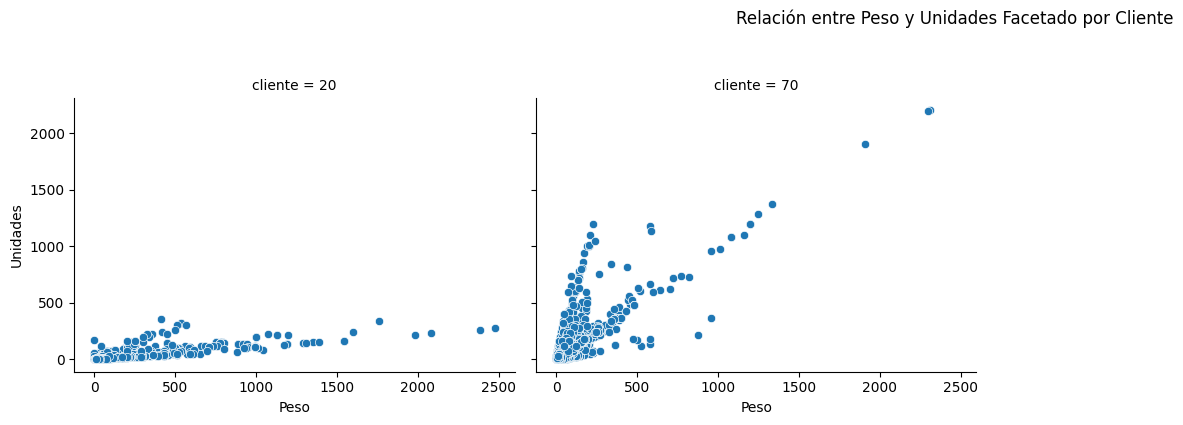

In [10]:
# Crear el FacetGrid, facetando por cliente
g = sns.FacetGrid(df, col='cliente', col_wrap=4, height=4, aspect=1.2)
g.map(sns.scatterplot, 'Peso', 'Unidades')

# Añadir título general
g.fig.suptitle('Relación entre Peso y Unidades Facetado por Cliente', y=1.05)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

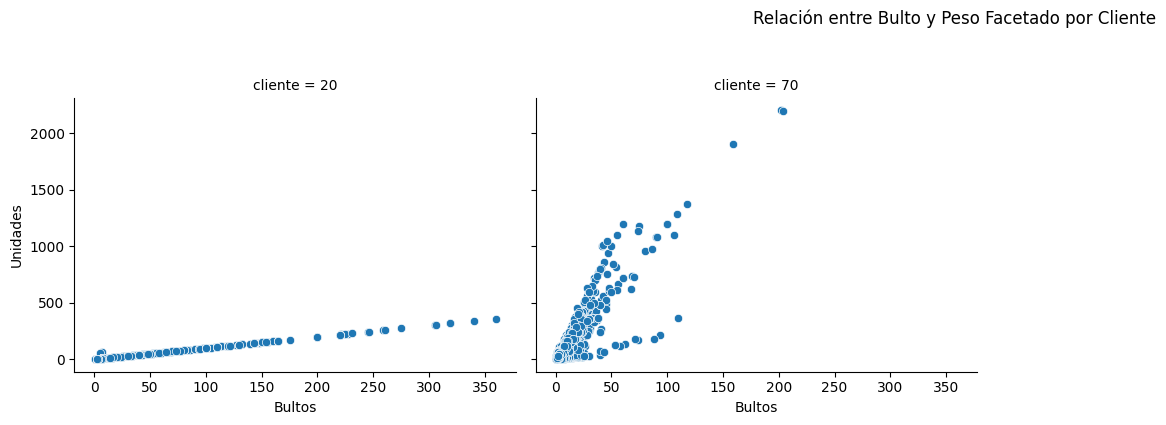

In [22]:
# Crear el FacetGrid, facetando por cliente
g = sns.FacetGrid(df, col='cliente', col_wrap=4, height=4, aspect=1.2)
g.map(sns.scatterplot, 'Bultos', 'Unidades')

# Añadir título general
g.fig.suptitle('Relación entre Bulto y Peso Facetado por Cliente', y=1.05)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

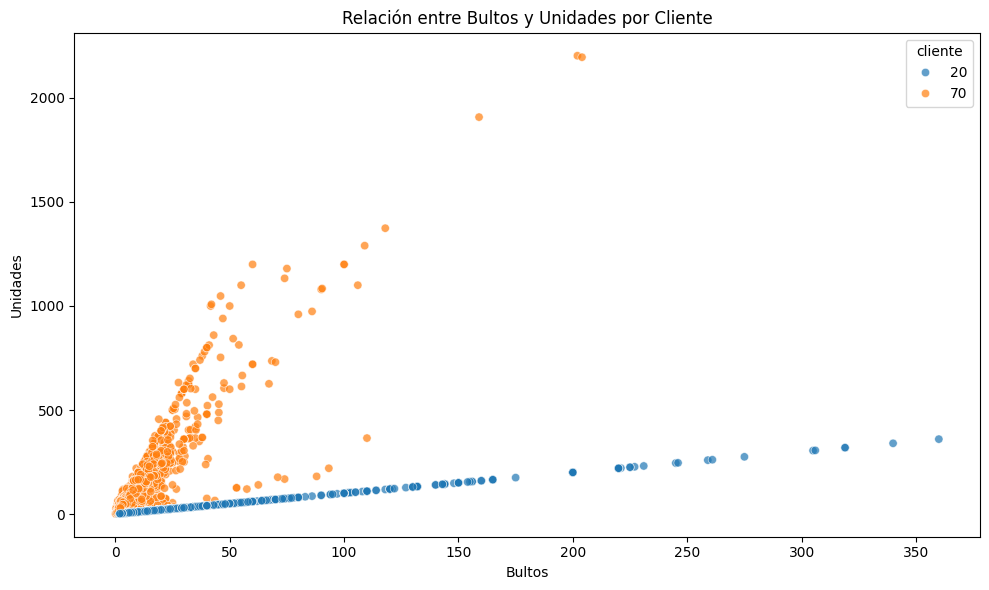

In [18]:
# Crear el scatter plot de Bultos vs Unidades, coloreado por cliente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bultos', y='Unidades', hue='cliente', palette='tab10', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Bultos')
plt.ylabel('Unidades')
plt.title('Relación entre Bultos y Unidades por Cliente')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

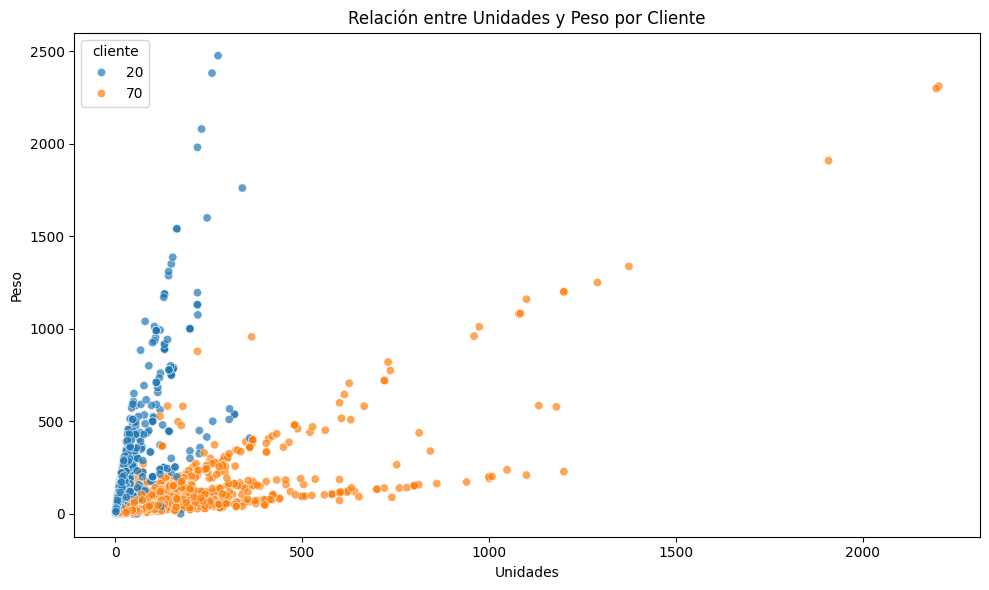

In [21]:
# Crear el scatter plot de Bultos vs Unidades, coloreado por cliente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unidades', y='Peso', hue='cliente', palette='tab10', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Unidades')
plt.ylabel('Peso')
plt.title('Relación entre Unidades y Peso por Cliente')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

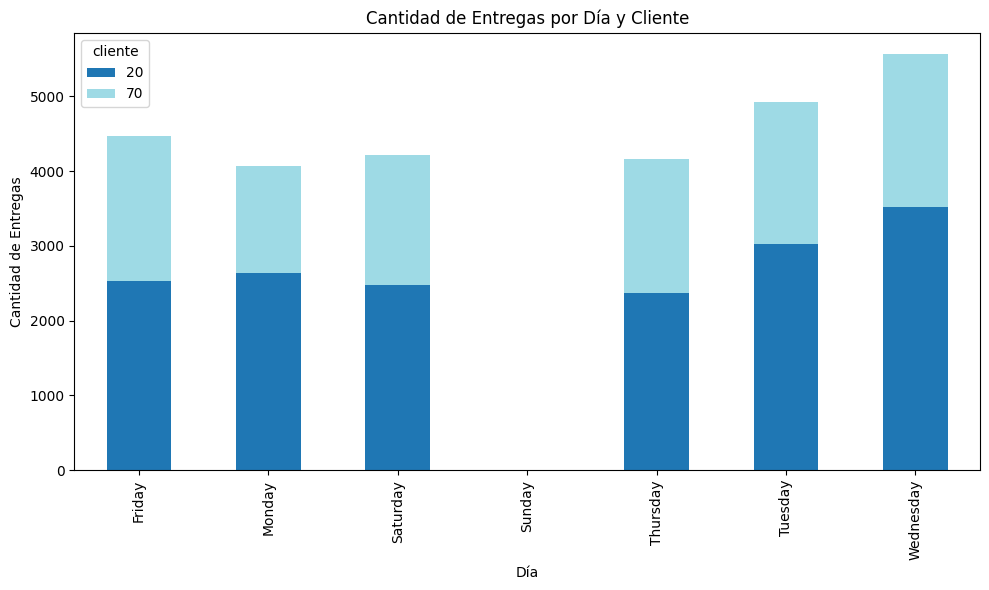

In [24]:
# Agrupar por día y cliente, y contar las entregas
entregas_por_dia_cliente = df.groupby(['VisitaDia', 'cliente']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
entregas_por_dia_cliente.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Añadir etiquetas y título
plt.xlabel('Día')
plt.ylabel('Cantidad de Entregas')
plt.title('Cantidad de Entregas por Día y Cliente')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Estudiemos la tardanza...

### Mapas Interactivos

In [5]:
# df = df.dropna(subset=['latitud', 'longitud'])

# Agrupar por localidad y calcular la cantidad total de repartos y las coordenadas promedio
repartos_por_localidad = df.groupby('localidad').agg({
        'latitud': 'mean',
        'longitud': 'mean',
        'localidad': 'size'
    }).rename(columns={'localidad': 'cantidad_repartos'}).reset_index()

# Crear el mapa centrado en Buenos Aires
m = folium.Map(location = [-34.603722, -58.381592], zoom_start = 12)

# Añadir un círculo por localidad con información de repartos
for i, row in repartos_por_localidad.iterrows():
    folium.CircleMarker(
        location    = [row['latitud'], row['longitud']],
        radius      = np.log(row['cantidad_repartos']) * 5,  # Ajustar el tamaño del círculo
        popup       = f"Localidad: {row['localidad']}<br>Cantidad de repartos: {row['cantidad_repartos']}",
        color       = 'blue',
        fill        = True,
        fill_color  = 'blue'
    ).add_to(m)

# Añadir un HeatMap basado en las coordenadas promedio de cada localidad
heat_data = [[row['latitud'], row['longitud'], row['cantidad_repartos']] for index, row in repartos_por_localidad.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa en un archivo HTML
m.save("heatmap_por_localidad_buenos_aires.html")

# Mostrar el mapa (si estás en Jupyter Notebook)
m